<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [5]:
# Import torch
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [7]:
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# Poi usa
device = get_device()
print(device)


2.7.0
mps


## 1. What are 3 areas in industry where computer vision is currently being used?

- Halthcare and Medical Imaging
- Quality Control
- Security

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting occurs when a machine learning model learns the training data too well, memorizing specific details and noise rather than learning the underlying patterns that would help it perform well on new, unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Use more training data, apply regularization techniques, implement cross-validation, reduce model complexity, or use dropout layers in neural networks. Early stopping during training can also help by halting the process before the model starts memorizing noise.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [8]:
# Setup training data
from torchvision import datasets
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:03<00:00, 2.67MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 241kB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.35MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.22MB/s]


In [9]:
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [10]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [11]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [13]:
# See the first training sample
image, label = train_data[0]
image, label
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {label} -> {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: 5 -> 5 - five


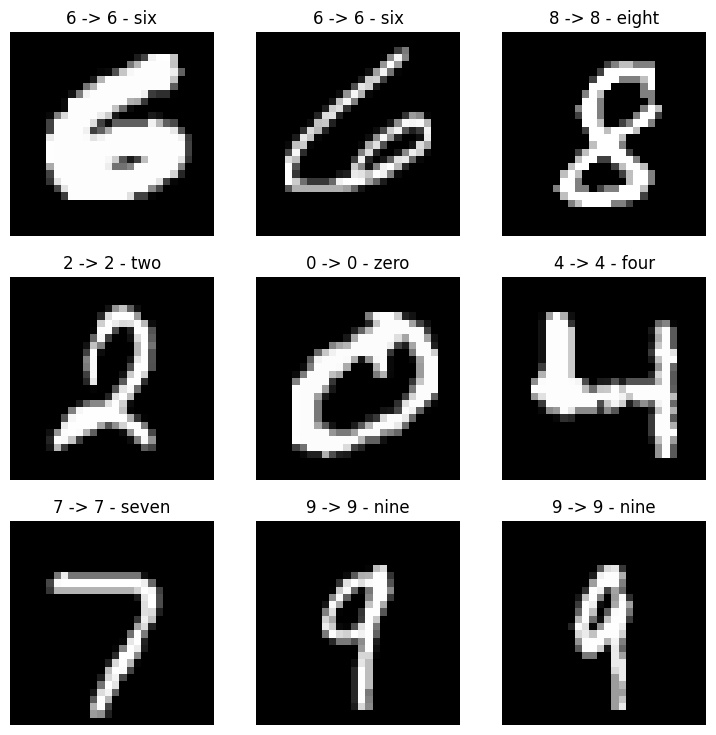

In [16]:
# Plot 5
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 3,3
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"{label} -> {class_names[label]}");
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [17]:
from torch.utils.data import DataLoader
# setup batch size hyperparameter
BATCH_SIZE = 32
# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x12600ad10>,
 <torch.utils.data.dataloader.DataLoader at 0x126008520>)

In [18]:
# Let's checkout what we've created

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x12600ad10>, <torch.utils.data.dataloader.DataLoader object at 0x126008520>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [19]:
# Create a convolutional Neural Network
class MNISTMODEL(nn.Module):
    """
    Model architecture that replicate TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x
        

In [20]:
torch.manual_seed(42)

model = MNISTMODEL(input_shape=1, # one colore
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [22]:
print(model.classifier)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=490, out_features=10, bias=True)
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device =device):
    """Performs a training with model trying to learn on data_laoder""" 
    train_loss, train_acc = 0,0

    model.train()
    
    for batch, (X,y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2 . Calculatre the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # from logits -> prediction labels

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # Backpropagation
        optimizer.step()

       
    
    # Divide total train loss by lenght of train dataloader
    train_loss/= len(data_loader)
    train_acc /= len(data_loader)

     # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}")

In [27]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""

    test_loss, test_acc = 0,0

    model.eval()

    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1))

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n ")
            

In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device):
    """Return a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        
        for X, y in data_loader:
            # Make our data device agnostic
            X,y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
           "model_acc": acc}

In [28]:
## Setup loss function and optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.1)

In [ ]:
model.state_dict()

In [29]:
## Training Model
torch.manual_seed(42)

torch.mps.manual_seed(42)

# Train and test model
epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

Epoch: 0
-------
Train loss: 0.33371 | Train Acc: 88.78
Test loss: 0.07267 | Test acc: 97.67%
 
Epoch: 1
-------
Train loss: 0.08133 | Train Acc: 97.45
Test loss: 0.07364 | Test acc: 97.60%
 
Epoch: 2
-------
Train loss: 0.06434 | Train Acc: 97.98
Test loss: 0.05480 | Test acc: 98.14%
 


In [34]:
# Get model results
model_results = eval_model(
    model=model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_results

{'model_name': 'MNISTMODEL',
 'model_loss': 0.054796792566776276,
 'model_acc': 98.1429712460064}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [38]:
import matplotlib.pyplot as plt
import torch
import random

def visualize_predictions(model, test_dataset, num_samples=5, device=None):
    """
    Visualizza le predizioni del modello confrontandole con le label target
    
    Args:
        model: Il modello addestrato
        test_dataset: Il dataset di test (es. test_data)
        num_samples: Numero di campioni da visualizzare
        device: Device su cui eseguire il modello
    """
    if device is None:
        # Gestisce MPS per Mac, CUDA per GPU NVIDIA, altrimenti CPU
        if torch.backends.mps.is_available():
            device = torch.device("mps")
        elif torch.cuda.is_available():
            device = torch.device("cuda")
        else:
            device = torch.device("cpu")
            
    # Seleziona campioni casuali
    random_indices = random.sample(range(len(test_dataset)), num_samples)
    
    # Crea una figura con subplot
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    if num_samples == 1:
        axes = [axes]
    
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for i, idx in enumerate(random_indices):
            # Ottieni il campione e la label target
            sample, target_label = test_dataset[idx]
            
            # Fai la predizione
            sample_batch = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample_batch)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_label = torch.argmax(pred_prob).cpu().item()
            confidence = torch.max(pred_prob).cpu().item()
            
            # Visualizza l'immagine
            if sample.shape[0] == 1:  # Se è in formato CHW con 1 canale
                image = sample.squeeze().cpu()
            else:
                image = sample.cpu()
            
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')
            
            # Colore del titolo: verde se corretto, rosso se sbagliato
            color = 'green' if pred_label == target_label else 'red'
            
            # Titolo with predizione vs target
            title = f'Pred: {pred_label} | True: {target_label}\nConf: {confidence:.2f}'
            axes[i].set_title(title, color=color, fontsize=10)

    plt.tight_layout()
    plt.show()


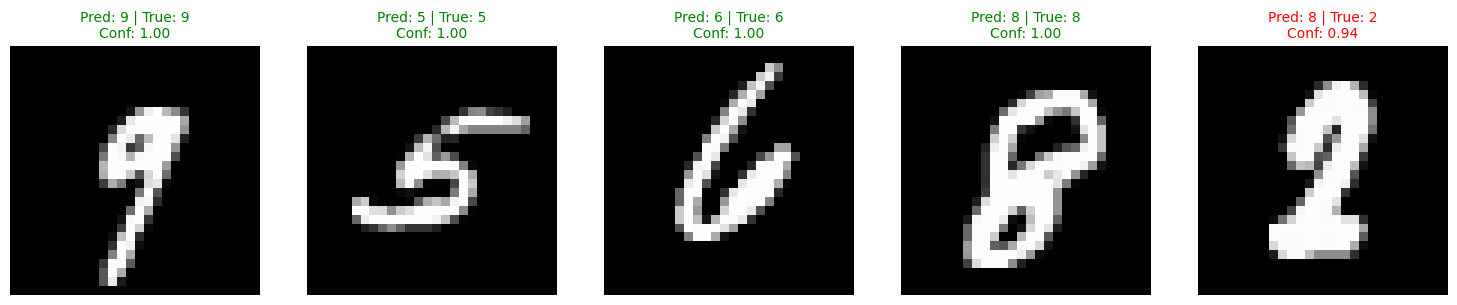

In [42]:
visualize_predictions(model, test_data, num_samples=5)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [44]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from torch.utils.data import DataLoader

def plot_confusion_matrix_torchmetrics(model, test_dataset, device=None, batch_size=32):
    """
    Crea e visualizza la confusion matrix usando torchmetrics e mlxtend
    
    Args:
        model: Il modello addestrato
        test_dataset: Il dataset di test
        device: Device per l'inferenza
        batch_size: Dimensione del batch per l'inferenza
    """
    if device is None:
        if torch.backends.mps.is_available():
            device = torch.device("mps")
        elif torch.cuda.is_available():
            device = torch.device("cuda")
        else:
            device = torch.device("cpu")
    
    # Inizializza ConfusionMatrix di torchmetrics
    confmat = ConfusionMatrix(task="multiclass", num_classes=10).to(device)
    
    # Crea un DataLoader per processare il test set in batch
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    model.to(device)
    model.eval()
    
    all_predictions = []
    all_targets = []
    
    print("Facendo predizioni su tutto il test set...")
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            # Sposta i dati sul device
            X, y = X.to(device), y.to(device)
            
            # Predizioni
            pred_logits = model(X)
            pred_labels = torch.argmax(pred_logits, dim=1)
            
            # Aggiorna la confusion matrix
            confmat.update(pred_labels, y)
            
            # Salva per il classification report
            all_predictions.extend(pred_labels.cpu().numpy())
            all_targets.extend(y.cpu().numpy())
            
            if batch % 100 == 0:
                print(f"Processato batch {batch}/{len(test_dataloader)}")
    
    # Ottieni la confusion matrix finale
    cm = confmat.compute().cpu().numpy()
    
    # Calcola l'accuracy
    accuracy = np.sum(np.array(all_predictions) == np.array(all_targets)) / len(all_targets)
    
    # Plot della confusion matrix con mlxtend
    fig, ax = plot_confusion_matrix(
        conf_mat=cm,
        class_names=[str(i) for i in range(10)],
        show_absolute=True,
        show_normed=False,
        colorbar=True,
        figsize=(10, 8)
    )
    
    plt.title(f'Confusion Matrix - MNIST\nAccuracy: {accuracy:.4f}')
    plt.tight_layout()
    plt.show()
    
    # Stampa il classification report
    print("\nClassification Report:")
    print(classification_report(all_targets, all_predictions, 
                              target_names=[str(i) for i in range(10)]))
    
    return cm, accuracy

Facendo predizioni su tutto il test set...
Processato batch 0/313
Processato batch 100/313
Processato batch 200/313
Processato batch 300/313


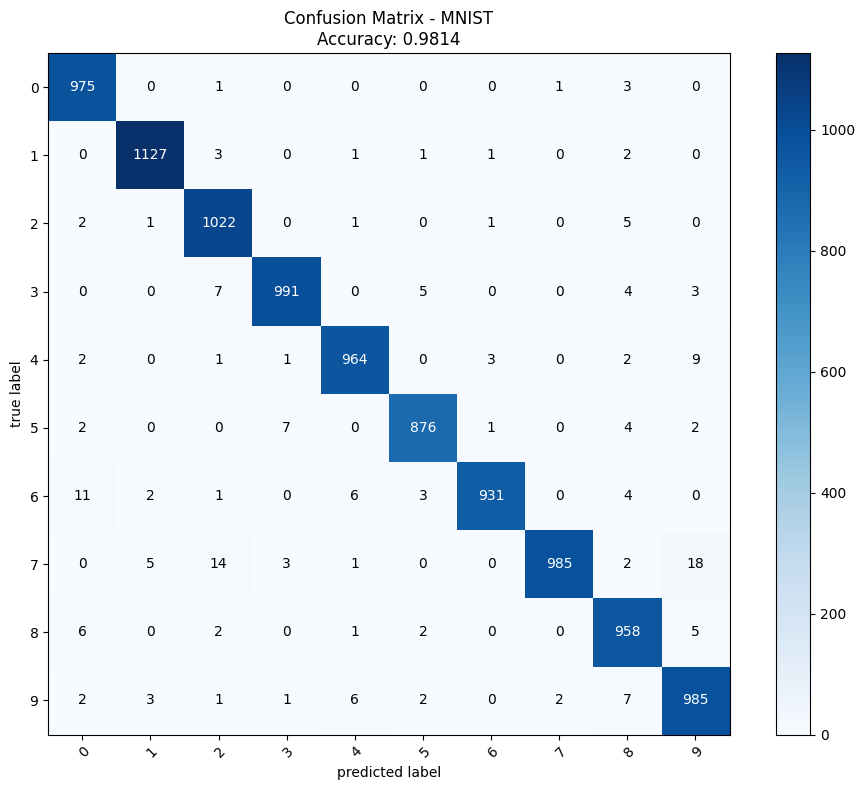


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       1.00      0.96      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
cm, accuracy = plot_confusion_matrix_torchmetrics(model, test_data)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [46]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def test_conv2d_kernel_sizes():
    """
    Test dell'effetto di diversi kernel_size su un layer Conv2d
    """
    # Crea un tensor casuale di shape [1, 3, 64, 64]
    # [batch_size, channels, height, width]
    random_tensor = torch.randn(1, 3, 64, 64)
    
    print(f"Input tensor shape: {random_tensor.shape}")
    print(f"Input tensor size: {random_tensor.numel()} elementi")
    print("-" * 50)
    
    # Test con diversi kernel sizes
    kernel_sizes = [1, 3, 5, 7, 11, 15, 21, 31]
    
    results = []
    
    for kernel_size in kernel_sizes:
        # Crea layer Conv2d con parametri fissi tranne kernel_size
        conv_layer = nn.Conv2d(
            in_channels=3,      # RGB input
            out_channels=16,    # 16 filtri di output
            kernel_size=kernel_size,
            stride=1,
            padding=0,          # No padding per vedere l'effetto puro
            bias=True
        )
        
        # Passa il tensor attraverso il layer
        try:
            output = conv_layer(random_tensor)
            
            # Calcola il numero di parametri
            num_params = sum(p.numel() for p in conv_layer.parameters())
            
            results.append({
                'kernel_size': kernel_size,
                'output_shape': output.shape,
                'output_spatial_size': (output.shape[2], output.shape[3]),
                'num_parameters': num_params,
                'receptive_field': kernel_size
            })
            
            print(f"Kernel Size: {kernel_size}x{kernel_size}")
            print(f"  Output shape: {output.shape}")
            print(f"  Spatial dimensions: {output.shape[2]}x{output.shape[3]}")
            print(f"  Number of parameters: {num_params}")
            print(f"  Receptive field: {kernel_size}x{kernel_size}")
            print()
            
        except Exception as e:
            print(f"Kernel Size {kernel_size}: ERROR - {e}")
            print()
    
    return results, random_tensor

def test_conv2d_with_padding():
    """
    Test con padding per mantenere le dimensioni spaziali
    """
    random_tensor = torch.randn(1, 3, 64, 64)
    
    print("=" * 60)
    print("TEST CON PADDING (per mantenere dimensioni spaziali)")
    print("=" * 60)
    
    kernel_sizes = [1, 3, 5, 7, 11, 15]
    
    for kernel_size in kernel_sizes:
        # Calcola padding per mantenere le stesse dimensioni spaziali
        padding = kernel_size // 2
        
        conv_layer = nn.Conv2d(
            in_channels=3,
            out_channels=16,
            kernel_size=kernel_size,
            stride=1,
            padding=padding,  # Padding per mantenere dimensioni
            bias=True
        )
        
        output = conv_layer(random_tensor)
        num_params = sum(p.numel() for p in conv_layer.parameters())
        
        print(f"Kernel Size: {kernel_size}x{kernel_size} (padding={padding})")
        print(f"  Output shape: {output.shape}")
        print(f"  Parameters: {num_params}")
        print()

def visualize_kernel_effects():
    """
    Visualizza l'effetto dei diversi kernel size
    """
    results, _ = test_conv2d_kernel_sizes()
    
    # Estrai dati per i grafici
    kernel_sizes = [r['kernel_size'] for r in results]
    output_heights = [r['output_spatial_size'][0] for r in results]
    num_params = [r['num_parameters'] for r in results]
    
    # Crea subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Grafico 1: Dimensioni output vs Kernel Size
    ax1.plot(kernel_sizes, output_heights, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Kernel Size')
    ax1.set_ylabel('Output Spatial Dimension')
    ax1.set_title('Output Size vs Kernel Size\n(Input: 64x64, No Padding)')
    ax1.grid(True, alpha=0.7)
    ax1.set_xticks(kernel_sizes)
    
    # Aggiungi annotazioni
    for i, (k, h) in enumerate(zip(kernel_sizes, output_heights)):
        ax1.annotate(f'{h}x{h}', (k, h), textcoords="offset points", 
                    xytext=(0,10), ha='center')
    
    # Grafico 2: Numero di parametri vs Kernel Size
    ax2.plot(kernel_sizes, num_params, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Kernel Size')
    ax2.set_ylabel('Number of Parameters')
    ax2.set_title('Parameters vs Kernel Size\n(3→16 channels)')
    ax2.grid(True, alpha=0.7)
    ax2.set_xticks(kernel_sizes)
    
    # Aggiungi annotazioni
    for i, (k, p) in enumerate(zip(kernel_sizes, num_params)):
        ax2.annotate(f'{p}', (k, p), textcoords="offset points", 
                    xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.show()

def demonstrate_receptive_field():
    """
    Dimostra il concetto di receptive field
    """
    print("=" * 60)
    print("RECEPTIVE FIELD ANALYSIS")
    print("=" * 60)
    
    input_size = 64
    kernel_sizes = [1, 3, 5, 7, 11, 15, 21, 31]
    
    print(f"Input size: {input_size}x{input_size}")
    print()
    
    for kernel_size in kernel_sizes:
        # Calcola output size senza padding
        output_size = input_size - kernel_size + 1
        
        # Percentuale di input che ogni pixel di output "vede"
        receptive_field_percentage = (kernel_size ** 2) / (input_size ** 2) * 100
        
        if output_size > 0:
            print(f"Kernel {kernel_size}x{kernel_size}:")
            print(f"  Output size: {output_size}x{output_size}")
            print(f"  Receptive field: {kernel_size}x{kernel_size} pixels")
            print(f"  RF percentage of input: {receptive_field_percentage:.2f}%")
            print(f"  Information compression: {input_size**2} → {output_size**2} pixels")
            print()


    

Input tensor shape: torch.Size([1, 3, 64, 64])
Input tensor size: 12288 elementi
--------------------------------------------------
Kernel Size: 1x1
  Output shape: torch.Size([1, 16, 64, 64])
  Spatial dimensions: 64x64
  Number of parameters: 64
  Receptive field: 1x1

Kernel Size: 3x3
  Output shape: torch.Size([1, 16, 62, 62])
  Spatial dimensions: 62x62
  Number of parameters: 448
  Receptive field: 3x3

Kernel Size: 5x5
  Output shape: torch.Size([1, 16, 60, 60])
  Spatial dimensions: 60x60
  Number of parameters: 1216
  Receptive field: 5x5

Kernel Size: 7x7
  Output shape: torch.Size([1, 16, 58, 58])
  Spatial dimensions: 58x58
  Number of parameters: 2368
  Receptive field: 7x7

Kernel Size: 11x11
  Output shape: torch.Size([1, 16, 54, 54])
  Spatial dimensions: 54x54
  Number of parameters: 5824
  Receptive field: 11x11

Kernel Size: 15x15
  Output shape: torch.Size([1, 16, 50, 50])
  Spatial dimensions: 50x50
  Number of parameters: 10816
  Receptive field: 15x15

Kernel Siz

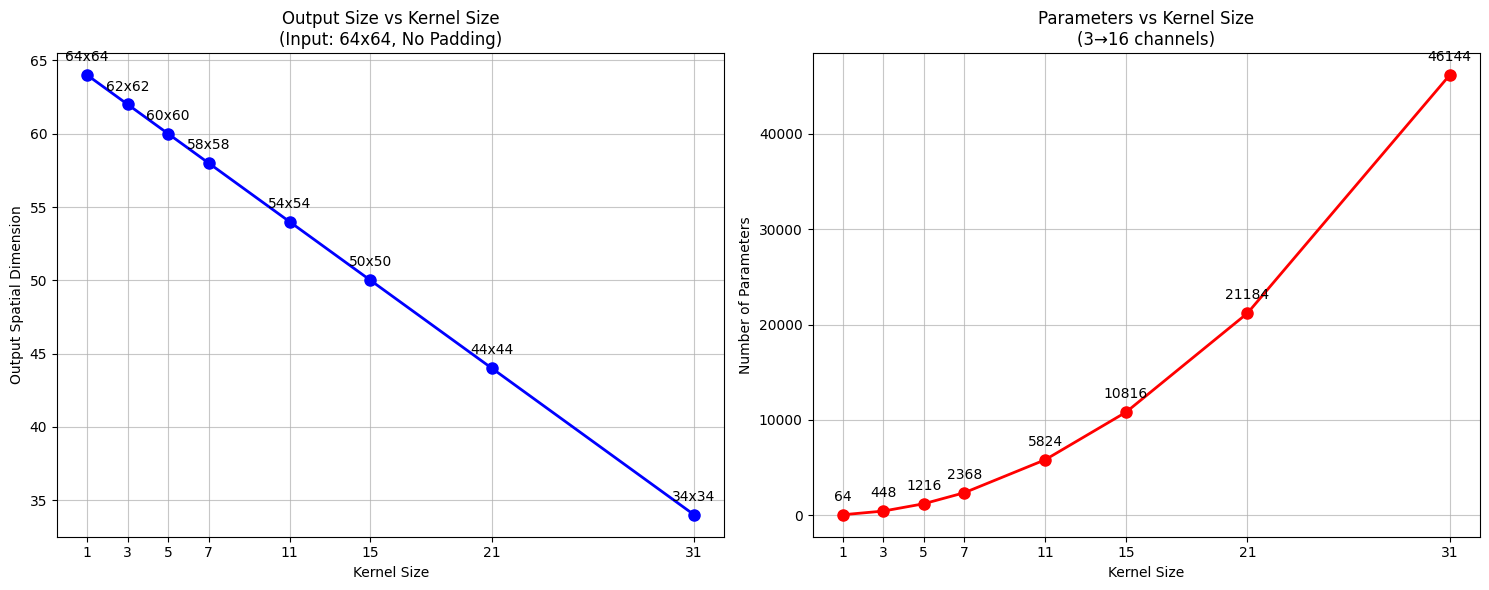

OSSERVAZIONI CHIAVE:
1. KERNEL SIZE ↑ → OUTPUT SIZE ↓ (senza padding)
2. KERNEL SIZE ↑ → PARAMETRI ↑ (crescita quadratica)
3. KERNEL SIZE ↑ → RECEPTIVE FIELD ↑
4. Kernel grandi = più contesto, meno dettagli spaziali
5. Kernel piccoli = meno parametri, più dettagli spaziali


In [47]:
# Test principale
results, input_tensor = test_conv2d_kernel_sizes()
    
# Test con padding
test_conv2d_with_padding()
    
# Analisi receptive field
demonstrate_receptive_field()
    
# Visualizzazioni
visualize_kernel_effects()
    
print("=" * 60)
print("OSSERVAZIONI CHIAVE:")
print("=" * 60)
print("1. KERNEL SIZE ↑ → OUTPUT SIZE ↓ (senza padding)")
print("2. KERNEL SIZE ↑ → PARAMETRI ↑ (crescita quadratica)")
print("3. KERNEL SIZE ↑ → RECEPTIVE FIELD ↑")
print("4. Kernel grandi = più contesto, meno dettagli spaziali")
print("5. Kernel piccoli = meno parametri, più dettagli spaziali")

1. Dimensioni di Output ↓

- Kernel 3x3: Output 62x62
- Kernel 11x11: Output 54x54
- Kernel 31x31: Output 34x34
- Formula: output_size = input_size - kernel_size + 1

2. Numero di Parametri ↑ (crescita quadratica)

- Kernel 1x1: ~50 parametri
- Kernel 5x5: ~1,200 parametri
- Kernel 15x15: ~10,800 parametri
- Formula: params = (kernel_size² × in_channels × out_channels) + out_channels

3. Receptive Field ↑

- Kernel piccoli vedono dettagli locali
- Kernel grandi catturano pattern più ampi

4. Trade-off Fondamentali:
| Kernel Size | Vantaggi | Svantaggi |
|-------------|----------|-----------|
| Piccolo (1x1, 3x3) | • Meno parametri<br>• Dettagli fini<br>• Output grande | • Receptive field limitato<br>• Meno contesto globale |
| Grande (11x11, 15x15)  | • Receptive field ampio<br>• Cattura pattern complessi<br>• Meno layer necessari | • Molti parametri<br>• Output piccolo<br>• Rischio overfitting |


### 💡 Regola pratica:


- 3x3: Standard per la maggior parte delle CNN moderne
- 1x1: Per ridurre dimensionalità
- 5x5, 7x7: Per catturare pattern intermedi
- >11x11: Raramente usati, preferibili multiple conv 3x3